In this notebook I use the **Logistic map** technique to visualize the method and its behaviour in different plots.

# Actividad

1.   Deducir una expresión para el segundo mapeo y corroborar que da el mismo resultado que aplicar el primer mapeo al segundo.

2.   Crear un conjunto de líneas rectas que unan puntos del mapeo logístico; es decir, por ejemplo, sea un punto $P_1$ con coordenadas $x_0$ y su mapeo $x_1=M(r,x_0)$ entonces $P_1=(x_0,x_1)$. El segundo punto $P_2$ será su imagen en la recta $P_2=(x_1,x_1)$, con estos dos puntos se construye una línea recta.

3. Hacer un subplot de gráficas: uno para la trayectoria normal como en el punto anterior y, la segunda un plot de secuencia vs no. de iteraciones

4. ¿Para qué valor de $r$, la diferencial (línea recta cuya pendiente es la derivada) en el punto fijo intercepta a la recta identidad en exactamente 45 grados?

5. Aplicar el mapeo varias veces y graficar con *scatter*.

# I

Se sabe que la expresión para el mapeo logístico está dada por.

$$ f(x) = rx(1-x) $$

con $r \in \mathbb{R}$.

Sea $x$ un valor inicial arbitrario, entonces su  primer mapeo $m_1$ estará dado por.

$$ m_1 = r x (1-x)$$

Sabiendo esto, se contruye el segundo mapeo $m_2$ sutituyendo el primero $m_1$ el la fórmula del mapeo logístico, esto es,

$$ m_2 = r m_1 ( 1 - m_1 ) $$

Se sustituye $m_1$ en $m_2$.

\begin{align}
m_2 & =r[r x (1-x)][1-r x (1-x)] \\
& = r^2x(1-x) - r^3x^2(1-x)^2 \\
& = r^2x - r^2x^2 - r^3x^2 (1 - 2 x + x^2) \\
& = r^2x - r^2x^2 - r^3x^2 + 2 r^3x^3 - r^3x^4
\end{align}

La ecuación

$$ m_2 = r^2x - r^2x^2 - r^3x^2 + 2 r^3x^3 - r^3x^4 $$ debe funcionar igual que $$ m_2 = rm_1(1-m_1) $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

Se procede a graficar el segundo mapeo con las fórmulas propuestas. Se elige $r=3.8$

In [ ]:
def M(r,x):
  return r*x*(1-x)

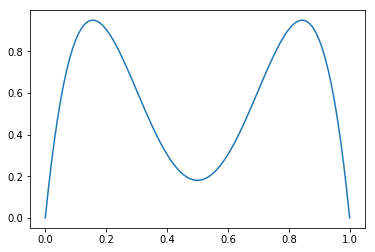

In [ ]:
r=3.8
x = np.linspace(0,1,100)

m1 = M(r,x)
m2 = M(r,m1)

plt.plot(x,m2)

Para la fórmula de grado cuatro

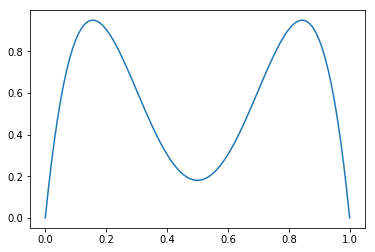

In [ ]:
def m(r,x):
  return r**2*x - r**2*x**2 - r**3*x**2 + 2*r**3*x**3 - r**3*x**4

plt.plot(x,m(r,x))

Se corrobora que arrojan el mismo resultado.

# II

Se propone un **def** que permita crear las líneas rectas.

In [ ]:
def grafica_remasterizada(x0,r,n):

  a = []

  m1 = M(r,x0)

  for i in range (n):
    if i == 0:
      a.append(x0)
    elif i == 1:
      a.append(m1)
    elif i > 1:
      m2 = M(r,m1)
      m1 = m2
      a.append(m2)

  for j in range(n-2):
      plt.plot([a[j],a[j+1]],[a[j+1],a[j+1]], 'k')
      plt.plot([a[j],a[j]],[a[j],a[j+1]], 'k')

  plt.plot([0,1],[0,1])
  plt.plot(x,M(r,x))

Se conoce que el punto fijo $x_f$ de la función logistica es,

$$ x_f = 1 - \frac{1}{r} $$

Para $r=3.8 \implies x_0 \approx 0.736842105263158 $, se elige un $x$ cercano a $x_f$, por ejemplo $x_0 = 0.7368$.

Observando de cerca

(0.7366, 0.7371)

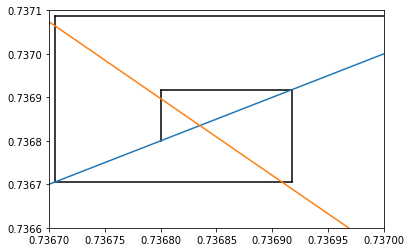

In [ ]:
grafica_remasterizada(0.7368,r,18)
plt.xlim([0.7367,0.7370])
plt.ylim([0.7366,0.7371])

En vista *normal*

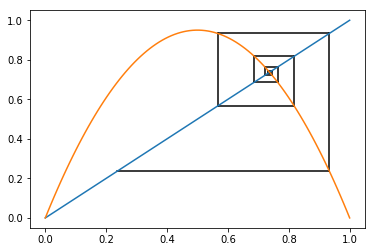

In [ ]:
grafica_remasterizada(0.7368,r,18)

Se observa que aún estándo cerca del punto fijo, hay divergencia.

# III

Para esta actividad se tomará el código visto en clase.

In [ ]:
def grafica_orbita(r,x0,n, ax=None):

  orbit = [x0]

  t = np.linspace(0,1)

  ax.plot(t,M(r,t), 'k', lw=2)

  ax.plot([0,1],[0,1], 'k', lw=2)

  x = x0
  for i in range(n):
    y = M(r,x)

    ax.plot([x,x],[x,y], 'b')
    ax.plot([x,y],[y,y], 'b')

    x = y

    orbit.append(x)

  ax.set_xlim(0,1)
  ax.set_ylim(0,1)
  ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")

  return np.array(orbit)

La primera gráfica es similar a la actividad anterior, pero en esta ocación; con el fin de asegurar convergencia, se cambia el valor de $r$ a $r=2.5$. En la segunda gráfica de plotea *x* vs *No. de iteraciones*

(0, 1)

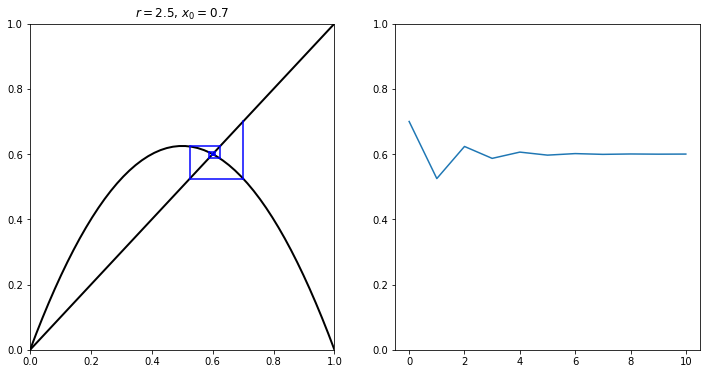

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

t1 = grafica_orbita(2.5,0.7,10,ax1)

ax2.plot(t1)
ylim(0,1)

Para valores de $r$ más grandes se hace evidente la divergencia, por ejemplo para el $r$ inicial $r=3.8$

(0, 1)

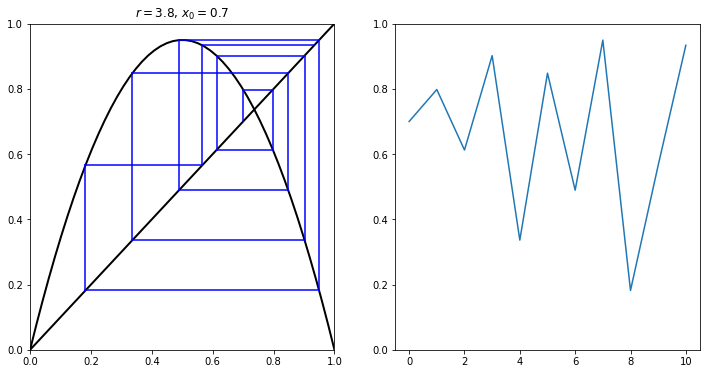

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

t1 = grafica_orbita(r,0.7,10,ax1)

ax2.plot(t1)
ylim(0,1)

# IV

Sean

$$ f(x) = rx(1-x) \textrm{ Mapeo logístico} $$

$$ g(x) = x \textrm{ Recta} $$

Para el estudio del comportamiento del primer mapeo y la recta, es decir $f(x)$ y $g(x)$, se procederá a construir la recta tangente al punto fijo. Así.

La derivada de $f(x)$ es

$$ f'(x) = r - 2rx $$

Al evaluar en el punto fijo, se obtiene la pendiente de la recta tangente en ese punto, es decir en $(1-\frac{1}{r}, f(1-\frac{1}{r}))$.

$$ f'\left(1-\frac{1}{r}\right) = 2 -r  $$

Se contruye entonces con esa pendiente una recta de la forma $y=mx+b$,

$$ y(x) = (2-r)x + b $$

Para hallar el valor de la ordenada al origen, basta saber que $y$ evaluada en el punto fijo, debe ser igual a $g(x)$ evaluada en el mismo lugar, esto es.

$$ y\left(1-\frac{1}{r}\right) = g\left(1-\frac{1}{r}\right) = 1-\frac{1}{r} = (2-r)\left(1-\frac{1}{r}\right) + b $$

Se obtiene que $b=\frac{1}{r} + r - 2$, así.

$$ y(x) = (2-r)x + \frac{1}{r} + r - 2 $$


De aqui decimos que su pendiente  es $p_1 = 2 - r$. Como la pendiente de la recta $g(x)=x$ es $p_2 = 1$, serán perperdiculares si.

$$ p_1 p_2 = -1 $$

Esto se satisface cuando $r=3$. Por otra parte las rectas formarán exactamente $45^{\circ}$ cuando.

$$ \tan{\theta} = \frac{p_2 - p_1}{1 + p_1 p_2} $$

Entonces

\begin{align}
\tan{45} & = \frac{1 - (2 -r)}{1 + (2+r)} \\ \\
1 & = \frac{-1 + r}{3 - r} \\ \\
3 - r & = -1 + r \\
2r & = 4 \\
\therefore r & = 2
\end{align}

$r$ debe valer dos para que las rectas se intercepten a $45^{\circ}$.

Graficamente se observa lo siguiente. Provando con $r<2$ al inicio

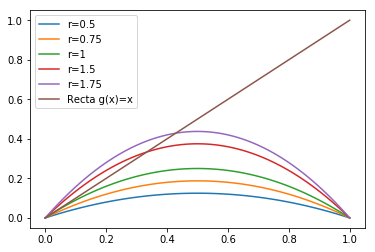

In [ ]:
r1 = 0.5
r2 = 0.75
r3 = 1
r4 = 1.5
r5 = 1.75
plt.plot(x,M(r1,x))
plt.plot(x,M(r2,x))
plt.plot(x,M(r3,x))
plt.plot(x,M(r4,x))
plt.plot(x,M(r5,x))
plt.plot([0,1],[0,1])
plt.legend(['r=0.5', 'r=0.75', 'r=1','r=1.5','r=1.75','Recta g(x)=x'])

Ahora, se introduce la recta tangente al punto fijo.

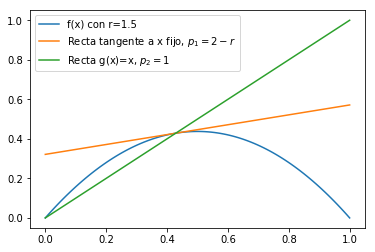

In [ ]:
plt.plot(x,M(r5,x))
plt.plot(x,(2-r5)*x + 1/r5 + r5 - 2)
plt.plot([0,1],[0,1])
plt.legend(['f(x) con r=1.5','Recta tangente a x fijo, $p_1 = 2 - r$','Recta g(x)=x, $p_2=1$'])

Las rectas de interceptarán a $45^{\circ}$ cuando $r=2$, así.

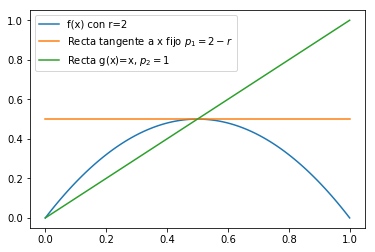

In [ ]:
plt.plot(x,M(2,x))
plt.plot(x,(2-2)*x + 1/2 + 2 - 2)
plt.plot([0,1],[0,1])
plt.legend(['f(x) con r=2','Recta tangente a x fijo $p_1 = 2 -r$','Recta g(x)=x, $p_2=1$'])

En efecto, visualmente se comprueba que se interceptan a $45^{\circ}$.

Finalmente, las rectas serán perperdiculares cuando $r=3$

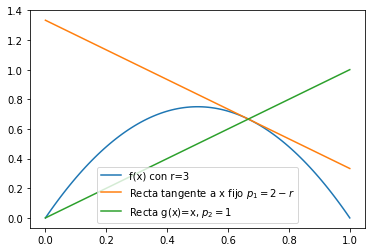

In [ ]:
plt.plot(x,M(3,x))
plt.plot(x,(2-3)*x + 1/3 + 3 - 2)
plt.plot([0,1],[0,1])
plt.legend(['f(x) con r=3','Recta tangente a x fijo $p_1 = 2 -r$','Recta g(x)=x, $p_2=1$'])

# V

In [ ]:
def Mn(r,x,n):
  m1 = M(r,x)
  if n == 0:
    return x
  elif n ==1:
    return m1
  elif n > 1:
    for i in range(n-1):
      m2 = M(r,m1)
      m1 = m2
    return m2

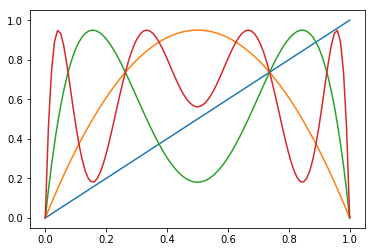

In [ ]:
plt.plot(x,Mn(r,x,0))
plt.plot(x,Mn(r,x,1))
plt.plot(x,Mn(r,x,2))
plt.plot(x,Mn(r,x,3))

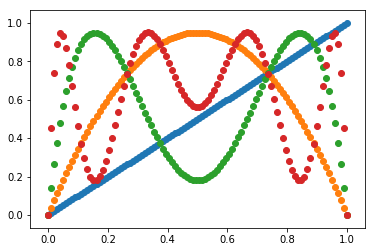

In [ ]:
plt.scatter(x,Mn(r,x,0))
plt.scatter(x,Mn(r,x,1))
plt.scatter(x,Mn(r,x,2))
plt.scatter(x,Mn(r,x,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


(0.734, 0.74)

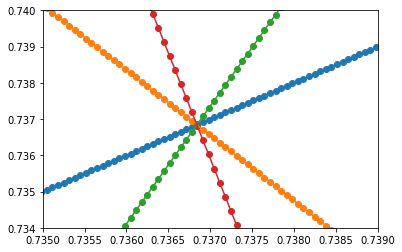

In [ ]:
q = np.linspace(0,1,10000*3/2)
plt.scatter(q,Mn(r,q,0))
plt.scatter(q,Mn(r,q,1))
plt.scatter(q,Mn(r,q,2))
plt.scatter(q,Mn(r,q,3))

plt.plot(q,Mn(r,q,0))
plt.plot(q,Mn(r,q,1))
plt.plot(q,Mn(r,q,2))
plt.plot(q,Mn(r,q,3))

plt.xlim([0.735,0.739])
plt.ylim([0.734,0.740])